# Final Project - Machine Learning
---
**Objectives**  
This machine learning project aims to build a predictive model to classify whether an insurance claims should be proceeded or not.

# **Import Libraries**

In [114]:
# Define Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

pd.options.display.max_columns = 200
warnings.filterwarnings('ignore')

# Import model libraries
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Feature Engineering
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from scipy.stats import f_oneway, chi2_contingency
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model Evaluation
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score

# Saving Models
import pickle

# **Data Loading**

## Load Data

In [5]:
df_raw = pd.read_csv('car_insurance.csv')

df_raw

,Unnamed: 0,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,tire flat,0.0
104996,104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,glass shatter,1.0
104997,104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,lamp broken,1.0
104998,104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,hatchback,0.0,0.0,10238,10000.0,0,0,0,dent,0.0


In [6]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           105000 non-null  int64  
 1   id                   105000 non-null  int64  
 2   age                  105000 non-null  object 
 3   gender               105000 non-null  object 
 4   driving_experience   105000 non-null  object 
 5   education            105000 non-null  object 
 6   income               105000 non-null  object 
 7   credit_score         105000 non-null  float64
 8   vehicle_ownership    105000 non-null  float64
 9   vehicle_year         105000 non-null  object 
 10  type_of_vehicle      105000 non-null  object 
 11  married              105000 non-null  float64
 12  children             105000 non-null  float64
 13  postal_code          105000 non-null  int64  
 14  annual_mileage       105000 non-null  float64
 15  speeding_violatio

## Drop Unnamed Column

In [7]:
df_raw_new = df_raw.drop('Unnamed: 0', axis=1)

df_raw_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   105000 non-null  int64  
 1   age                  105000 non-null  object 
 2   gender               105000 non-null  object 
 3   driving_experience   105000 non-null  object 
 4   education            105000 non-null  object 
 5   income               105000 non-null  object 
 6   credit_score         105000 non-null  float64
 7   vehicle_ownership    105000 non-null  float64
 8   vehicle_year         105000 non-null  object 
 9   type_of_vehicle      105000 non-null  object 
 10  married              105000 non-null  float64
 11  children             105000 non-null  float64
 12  postal_code          105000 non-null  int64  
 13  annual_mileage       105000 non-null  float64
 14  speeding_violations  105000 non-null  int64  
 15  duis             

## Check Missing Values

In [9]:
# Checking num of missing values in every columns
df_raw_new.isna().sum().sort_values(ascending=False)

id                     0
married                0
issue                  0
past_accidents         0
duis                   0
speeding_violations    0
annual_mileage         0
postal_code            0
children               0
type_of_vehicle        0
age                    0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
gender                 0
outcome                0
dtype: int64

## Check Duplicated Values

In [52]:
# Checking any duplicated rows
df_raw_new['id'].duplicated().sum()

6515

## Describe Data

In [10]:
# Describing the numeric data
df_raw_new.describe().T

,count,mean,std,min,25%,50%,75%,max
id,105000.0,394931.295905,279694.106053,101.00000,156351.750000,354679.500000,598602.250000,999976.000000
credit_score,105000.0,0.602173,0.138045,0.06688,0.514876,0.601112,0.703216,0.954075
vehicle_ownership,105000.0,0.827038,0.378216,0.00000,1.000000,1.000000,1.000000,1.000000
married,105000.0,0.584143,0.492871,0.00000,0.000000,1.000000,1.000000,1.000000
children,105000.0,0.520000,0.499602,0.00000,0.000000,1.000000,1.000000,1.000000
postal_code,105000.0,18045.439267,16709.040449,10238.00000,10238.000000,10238.000000,22957.750000,92101.000000
annual_mileage,105000.0,11061.228571,2972.355482,2000.00000,9000.000000,11000.000000,13000.000000,21000.000000
speeding_violations,105000.0,0.675676,1.383678,0.00000,0.000000,0.000000,1.000000,20.000000
duis,105000.0,0.129733,0.589714,0.00000,0.000000,0.000000,0.000000,6.000000
past_accidents,105000.0,0.549314,1.402809,0.00000,0.000000,0.000000,0.000000,15.000000


In [11]:
# Describing the categorical data
df_raw.describe(include='object').T

,count,unique,top,freq
age,105000,4,40-64,33716
gender,105000,2,male,65317
driving_experience,105000,4,20-29y,37493
education,105000,3,high school,46590
income,105000,4,upper class,51271
vehicle_year,105000,2,before 2015,57511
type_of_vehicle,105000,4,sports car,34592
issue,105000,6,glass shatter,17659


# **Exploratory Data Analysis**

## Columns Distributions

### Plot Distribution Functions

In [16]:
# Function to plot numeric distribution (histogram & boxplot)
def plot_distribution(col, colName, color='indianred'):
    plt.figure(figsize=(12,5))

    # Plot Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df_raw[col], kde=True, color=color, bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df_raw, x=col, color=color)
    plt.title('Boxplot')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

In [45]:
# Function to plot categorical distribution (barplot & piechart)
def plot_count(col, colName):
    labels = df_raw[col].value_counts().index.tolist()
    sizes = df_raw[col].value_counts().values.tolist()

    plt.figure(figsize=(12,5))

    # Barplot
    plt.subplot(1, 2, 1)
    sns.barplot(x=labels, y=sizes)
    plt.xticks(rotation=30)
    plt.title('Bar Chart')

    # Piechart
    plt.subplot(1, 2, 2)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Pie Chart')

    plt.suptitle(f'{colName} Distribution')
    plt.show()

In [15]:
df_raw_new.columns

Index(['id', 'age', 'gender', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'type_of_vehicle',
       'married', 'children', 'postal_code', 'annual_mileage',
       'speeding_violations', 'duis', 'past_accidents', 'issue', 'outcome'],
      dtype='object')

### Age Distribution

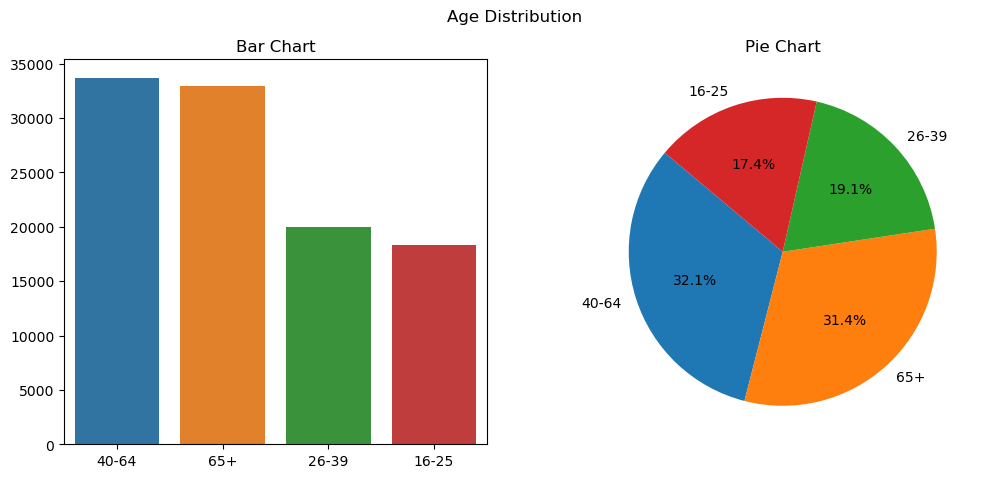

In [20]:
# Display the column distribution
plot_count('age', 'Age')

### Gender Distribution

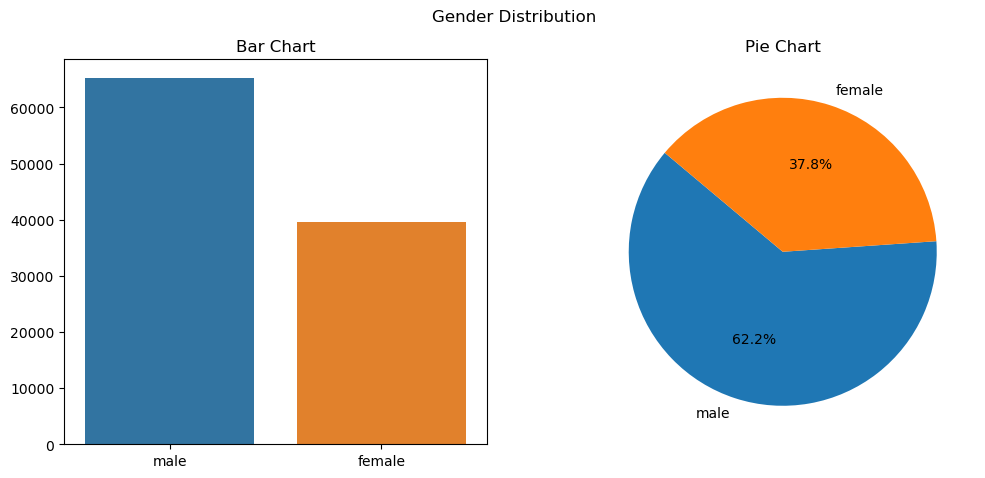

In [21]:
# Display the column distribution
plot_count('gender', 'Gender')

### Driving Experience Distribution

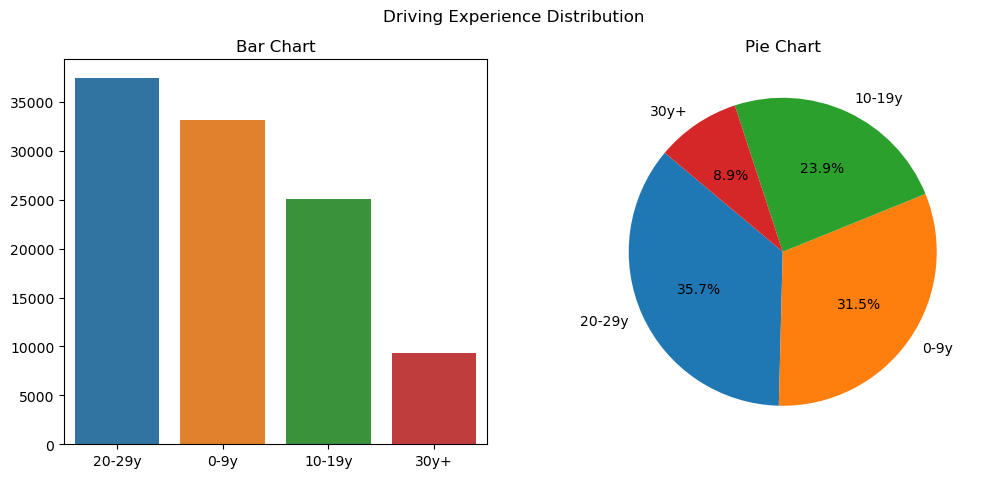

In [22]:
# Display the column distribution
plot_count('driving_experience', 'Driving Experience')

### Education Distribution

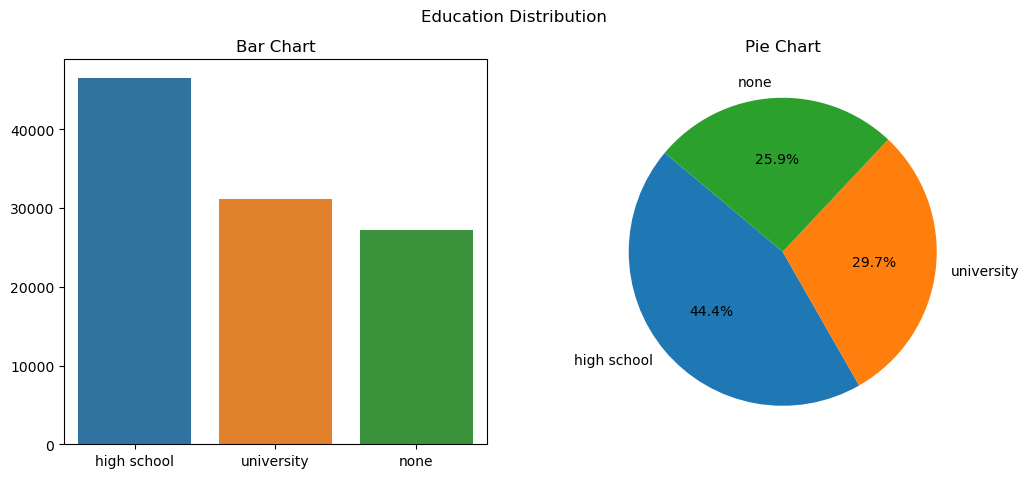

In [23]:
# Display the column distribution
plot_count('education', 'Education')

### Income Distribution

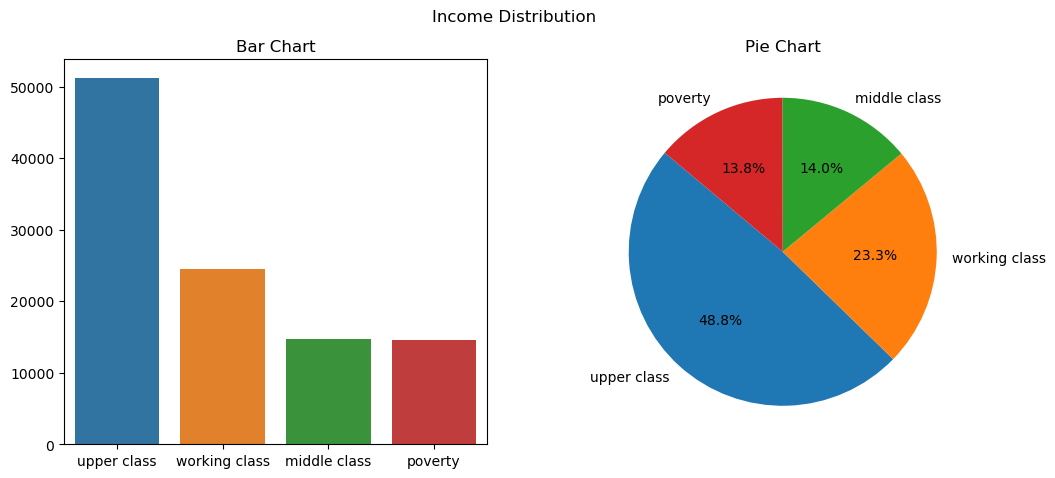

In [25]:
# Display the column distribution
plot_count('income', 'Income')

### Credit Score Distribution

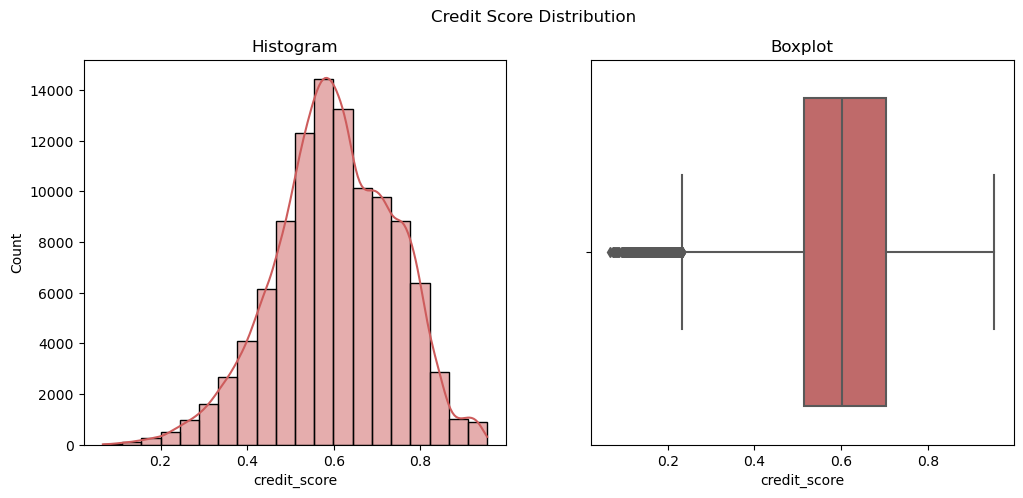

In [26]:
# Display the column distribution
plot_distribution('credit_score', 'Credit Score', 'indianred')

### Vehicle Ownership Distribution

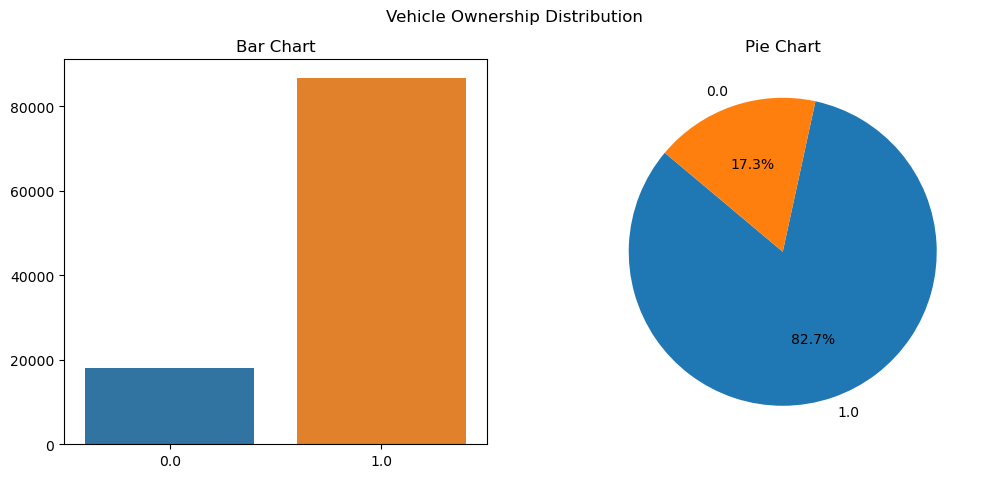

In [28]:
# Display the column distribution
plot_count('vehicle_ownership', 'Vehicle Ownership')

### Vehicle Year Distribution

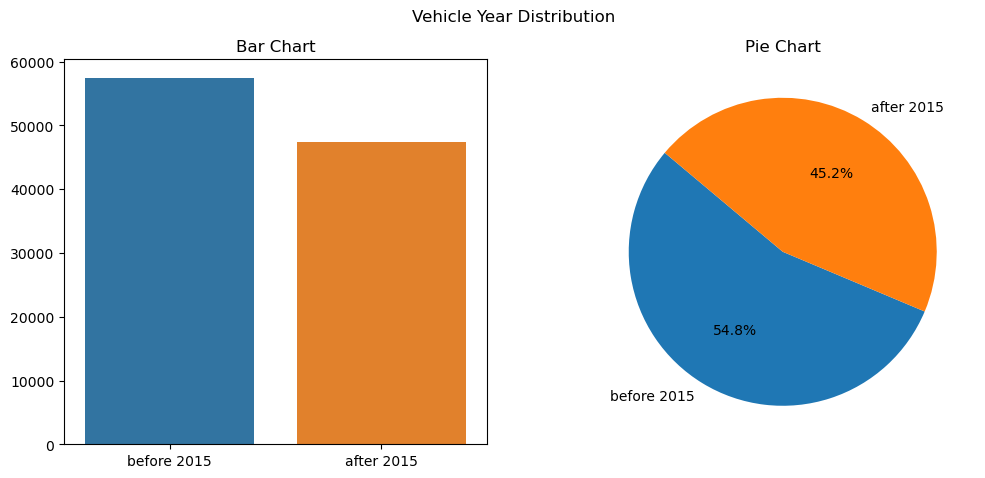

In [29]:
# Display the column distribution
plot_count('vehicle_year', 'Vehicle Year')

### Type of Vehicle Distribution

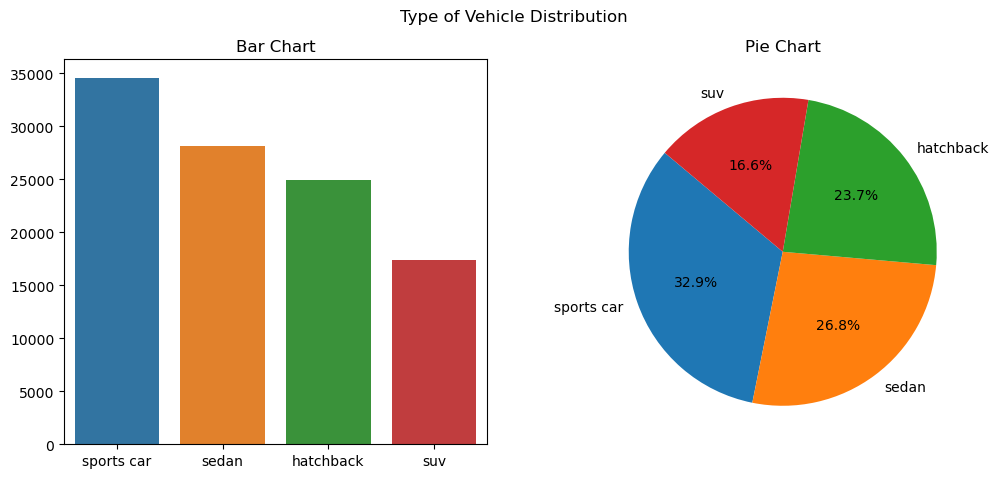

In [30]:
# Display the column distribution
plot_count('type_of_vehicle', 'Type of Vehicle')

### Married Distribution

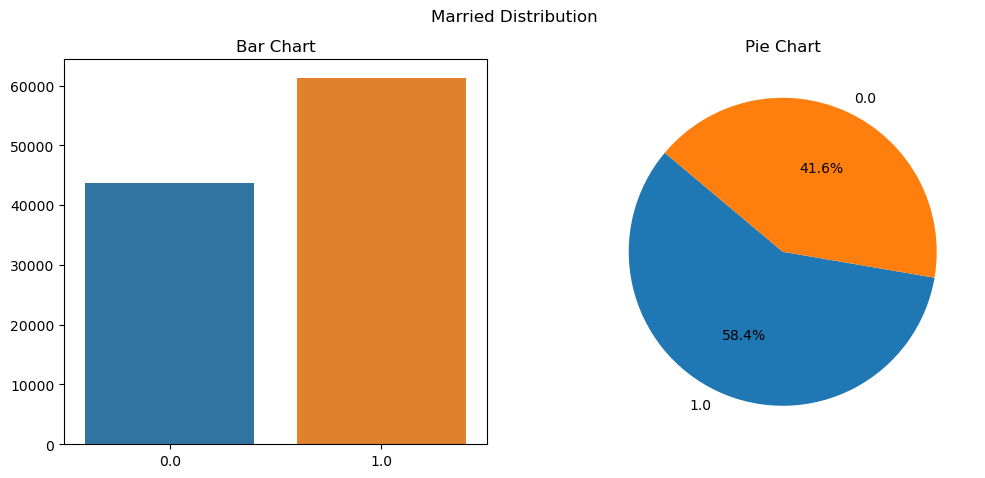

In [31]:
# Display the column distribution
plot_count('married', 'Married')

### Children Distribution

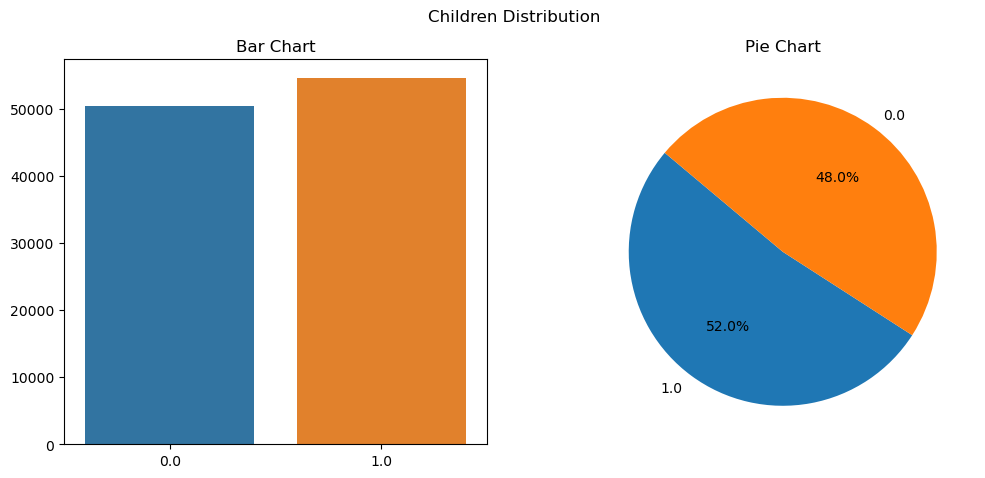

In [32]:
# Display the column distribution
plot_count('children', 'Children')

### Annual Mileage Distribution

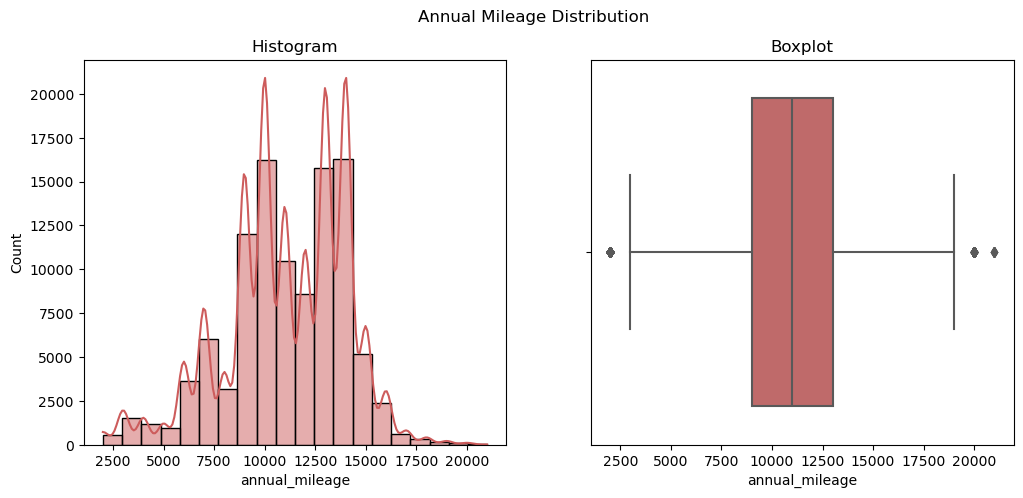

In [34]:
# Display the column distribution
plot_distribution('annual_mileage', 'Annual Mileage')

### Speeding Violations Distribution

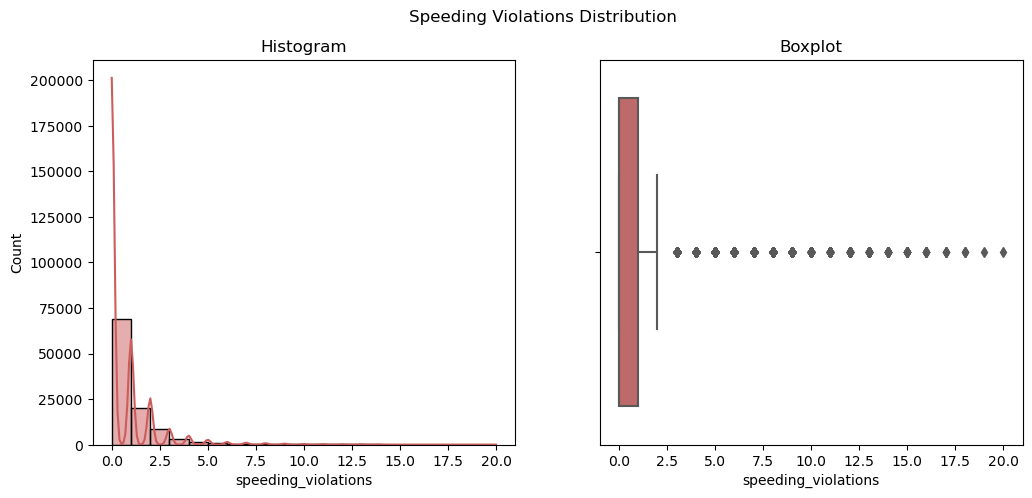

In [36]:
# Display the column distribution
plot_distribution('speeding_violations', 'Speeding Violations')

### DUIs Distribution

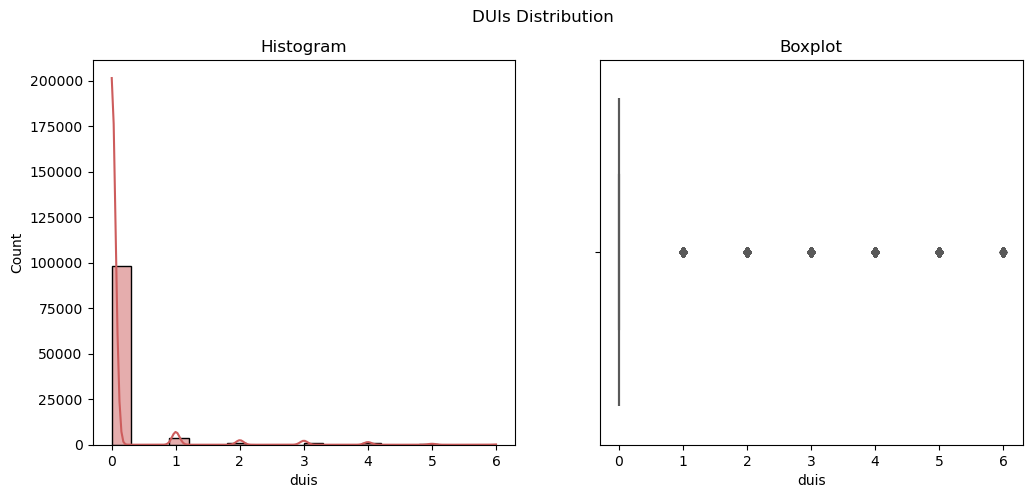

In [38]:
# Display the column distribution
plot_distribution('duis', 'DUIs')

### Past Accidents Distribution

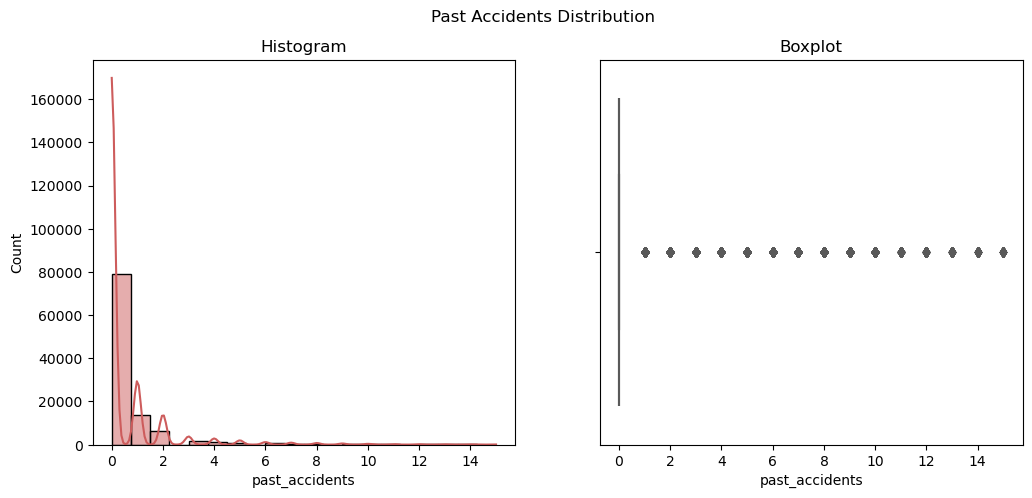

In [43]:
# Display the column distribution
plot_distribution('past_accidents', 'Past Accidents')

### Issue Distribution

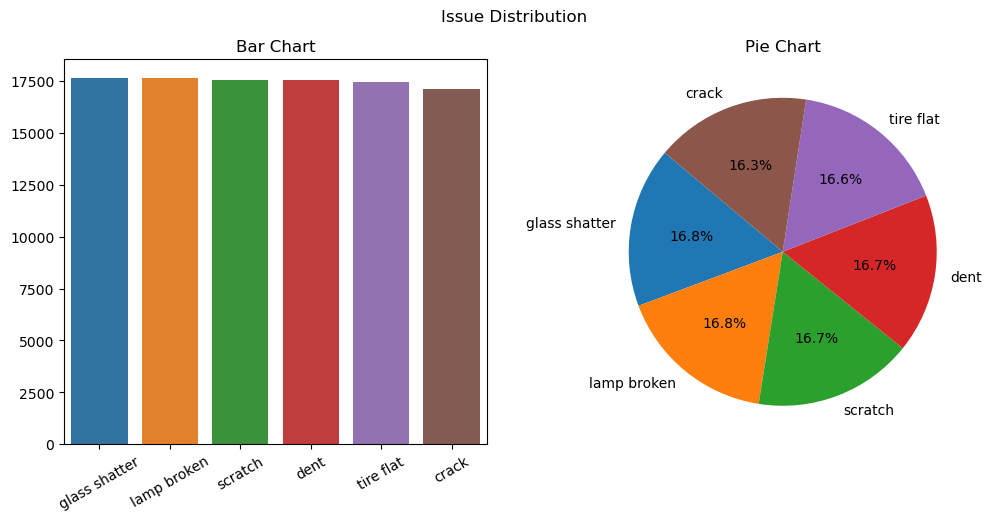

In [46]:
# Display the column distribution
plot_count('issue', 'Issue')

## Outcome Distribution

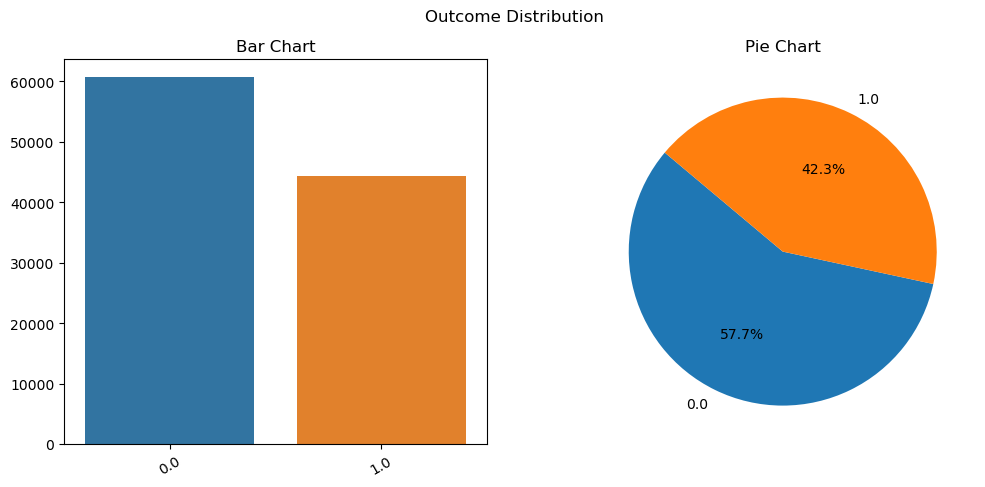

In [47]:
# Display the column distribution
plot_count('outcome', 'Outcome')

# **Feature Engineering**

## Copy the Data

In [93]:
# Copying the Data
df = df_raw_new.copy()

df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104995,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,tire flat,0.0
104996,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,glass shatter,1.0
104997,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,lamp broken,1.0
104998,984879,40-64,female,20-29y,high school,working class,0.483571,1.0,before 2015,hatchback,0.0,0.0,10238,10000.0,0,0,0,dent,0.0


## Handle Cardinality

In [94]:
# Defining all the categorical columns in data
cat_cols = list(df.select_dtypes(include='object').columns)

# For every categorical column
# check the number of unique values
cardinality_list = []
for col in cat_cols:
  cardinality_list.append([col, df[col].nunique()])

pd.DataFrame(columns=['Column Name', 'Num of Unique Values',], data=cardinality_list)

,Column Name,Num of Unique Values
0,age,4
1,gender,2
2,driving_experience,4
3,education,3
4,income,4
5,vehicle_year,2
6,type_of_vehicle,4
7,issue,6


## Drop Duplicated ID

In [95]:
df = df.drop_duplicates(subset='id').reset_index(drop=True)

df

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue,outcome
0,816393,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack,0.0
1,251762,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat,1.0
2,481952,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter,1.0
3,3506,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken,1.0
4,498013,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98480,516906,40-64,male,20-29y,university,upper class,0.282996,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,crack,0.0
98481,19557,65+,female,0-9y,high school,upper class,0.672255,1.0,before 2015,suv,0.0,0.0,31885,9000.0,2,0,0,tire flat,0.0
98482,222459,40-64,female,0-9y,none,working class,0.514193,1.0,after 2015,sedan,1.0,0.0,32277,10000.0,0,0,0,glass shatter,1.0
98483,83089,16-25,male,10-19y,none,upper class,0.461942,1.0,after 2015,sedan,1.0,0.0,34800,11000.0,0,0,0,lamp broken,1.0


## Split X (Features) and y (target)

In [96]:
# Splitting between X and y
X = df.drop(['outcome', 'id'], axis=1)
y = df['outcome']

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')
X.head()

X shape: (98485, 17)
y shape: (98485,)


,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,type_of_vehicle,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,issue
0,40-64,female,20-29y,university,middle class,0.638050,0.0,after 2015,sports car,0.0,0.0,37379,11000.0,0,0,0,crack
1,26-39,male,20-29y,high school,middle class,0.475741,1.0,before 2015,hatchback,1.0,0.0,10238,9000.0,0,0,0,tire flat
2,40-64,male,20-29y,none,middle class,0.839817,1.0,before 2015,sedan,1.0,1.0,10238,12000.0,0,0,0,glass shatter
3,40-64,male,20-29y,high school,upper class,0.682527,1.0,before 2015,sedan,0.0,1.0,92099,6000.0,1,0,0,lamp broken
4,40-64,female,20-29y,none,working class,0.572184,1.0,after 2015,sedan,1.0,1.0,32122,15000.0,0,0,1,glass shatter


## Split Train and Test set

In [97]:
# Splitting between Train and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (78788, 17)
X test shape: (19697, 17)
y train shape: (78788,)
y test shape: (19697,)


## Handling Outlier

In [98]:
# Define numeric columns
num_cols = X_train.select_dtypes(include=np.number).columns.to_list()

num_skewed_vals = []
skewed_cols = []

num_normal_vals = []
normal_cols = []

# For every numeric column
# Check the skewness value and determine whether
# the distribution skewed or normal
for col in num_cols:
    skew = X_train[col].skew()
    # Normal Distribution
    if skew <= 0.5 and skew >= -0.5:
        normal_cols.append(col)
        num_normal_vals.append([col, skew])
    # Skewed Distribution
    elif skew < -0.5 or skew > 0.5:
        skewed_cols.append(col)
        num_skewed_vals.append([col, skew])

# Display Columns with Skewed Distribution
print('Columns with Skewed Distribution')
pd.DataFrame(data=num_skewed_vals, columns=['Column Name', 'Skewness'])

Columns with Skewed Distribution


,Column Name,Skewness
0,vehicle_ownership,-1.734622
1,postal_code,2.991256
2,annual_mileage,-0.508013
3,speeding_violations,3.888105
4,duis,5.576762
5,past_accidents,4.340209


In [99]:
# Display Columns with Normal Distribution
print('Columns with Normal Distribution')
pd.DataFrame(data=num_normal_vals, columns=['Column Name', 'Skewness'])

Columns with Normal Distribution


,Column Name,Skewness
0,credit_score,-0.228184
1,married,-0.340682
2,children,-0.076923


In [100]:
# Define the skewed distribution but low variance columns
skew_low_vars = ['vehicle_ownership', 'duis', 'past_accidents']

# For every skewed distribution but low variance column
for skew_low in skew_low_vars:
    print(skew_low, end=' ')
    normal_cols.append(skew_low) # Adding to columns that will be handled using Gaussian Method
    skewed_cols.remove(skew_low) # Removing from columns that will be handled using IQR Method

vehicle_ownership duis past_accidents 

In [101]:
# Winsorizer declaration to handle the skewed data distribution
winsoriserIqr = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=skewed_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserIqr.fit_transform(X_train)
X_test_capped = winsoriserIqr.transform(X_test)

In [102]:
# Winsorizer declaration to handle the normal data distribution
winsoriserNormal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=normal_cols,
                            missing_values='ignore')

# Fit & transform for the X_train and transform only for the X_test
X_train_capped = winsoriserNormal.fit_transform(X_train_capped)
X_test_capped = winsoriserNormal.transform(X_test_capped)

In [103]:
# Check the Skewness of the capped numeric columns in X_train
X_train_capped[num_cols].skew()

credit_score          -0.208877
vehicle_ownership     -1.734622
married               -0.340682
children              -0.076923
postal_code            1.224063
annual_mileage        -0.485408
speeding_violations    1.298169
duis                   4.087818
past_accidents         2.630306
dtype: float64

## Handling Missing Value

In [104]:
# Checking num of missing values in every columns in X_train
X_train_capped.isna().sum().sort_values(ascending=False)

age                    0
married                0
past_accidents         0
duis                   0
speeding_violations    0
annual_mileage         0
postal_code            0
children               0
type_of_vehicle        0
gender                 0
vehicle_year           0
vehicle_ownership      0
credit_score           0
income                 0
education              0
driving_experience     0
issue                  0
dtype: int64

## Feature Selection

### Splitting between Numeric and Categorical Columns

In [105]:
# Splitting between Numeric and Categorical Column Names
num_cols = X_train_capped.select_dtypes(include = np.number).columns.tolist()
cat_cols = X_train_capped.select_dtypes(include = ['object']).columns.tolist()

print(f'Numeric ({len(num_cols)}):\n{num_cols}')
print()
print(f'Categorical ({len(cat_cols)}):\n{cat_cols}')

Numeric (9):
['credit_score', 'vehicle_ownership', 'married', 'children', 'postal_code', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents']

Categorical (8):
['age', 'gender', 'driving_experience', 'education', 'income', 'vehicle_year', 'type_of_vehicle', 'issue']


In [106]:
# Splitting between Numeric and Categorical Columns
X_train_num = X_train_capped[num_cols]
X_train_cat = X_train_capped[cat_cols]

X_test_num = X_test_capped[num_cols]
X_test_cat = X_test_capped[cat_cols]

X_train_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78788 entries, 37666 to 15725
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   credit_score         78788 non-null  float64
 1   vehicle_ownership    78788 non-null  float64
 2   married              78788 non-null  float64
 3   children             78788 non-null  float64
 4   postal_code          78788 non-null  float64
 5   annual_mileage       78788 non-null  float64
 6   speeding_violations  78788 non-null  float64
 7   duis                 78788 non-null  float64
 8   past_accidents       78788 non-null  float64
dtypes: float64(9)
memory usage: 6.0 MB


### Correlation between Outcome and X_Train Numeric Columns

In [107]:
# Correlation between outcome and X_Train Numeric Columns
stats = []
p_values = []
interprets = []
selected_num = []
not_selected_num = []

# Loop every column in numerical continous columns
for col in num_cols:
    statistic, pvalue = f_oneway(X_train[col], y_train)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_num.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_num.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': num_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,credit_score,9.728953e+03,0.000000e+00,Correlated
1,vehicle_ownership,3.347848e+04,0.000000e+00,Correlated
2,married,4.230163e+03,0.000000e+00,Correlated
3,children,1.500127e+03,0.000000e+00,Correlated
4,postal_code,9.146071e+04,0.000000e+00,Correlated
5,annual_mileage,1.091656e+06,0.000000e+00,Correlated
6,speeding_violations,2.337705e+03,0.000000e+00,Correlated
7,duis,1.130455e+04,0.000000e+00,Correlated
8,past_accidents,5.557374e+02,1.161323e-122,Correlated


### Correlation between Outcome and X_Train Categorical Features

In [108]:
# Correlation between default payment next month and X_train categorical features
stats = []
p_values = []
interprets = []
selected_cat = []
not_selected_cat = []

# Loop every column in categorical columns
for col in cat_cols:
    # Create a contingency table between the categorical feature and the target variable
    contingency_table = pd.crosstab(X_train[col], y_train)
    
    # Perform the Chi-square test
    statistic, pvalue, _, _ = chi2_contingency(contingency_table)

    if pvalue < 0.05:
        stats.append(statistic)
        p_values.append(pvalue)
        selected_cat.append(col)
        interprets.append('Correlated')
    else:
        stats.append(statistic)
        p_values.append(pvalue)
        not_selected_cat.append(col)
        interprets.append('Not Correlated')

pd.DataFrame({
    'Column Name': cat_cols,
    'Statistic': stats,
    'P-value': p_values,
    'Interprets': interprets
})

,Column Name,Statistic,P-value,Interprets
0,age,2.725458,0.435918,Not Correlated
1,gender,9.550288,0.001999,Correlated
2,driving_experience,21.964631,0.000066,Correlated
3,education,1.094044,0.578670,Not Correlated
4,income,2.238966,0.524314,Not Correlated
5,vehicle_year,0.006070,0.937901,Not Correlated
6,type_of_vehicle,14.139058,0.002722,Correlated
7,issue,4.679453,0.456238,Not Correlated


We want to retain the issue features.

In [109]:
# Define the feature to retain
features_to_retain = ['issue']

# For every feature needs to be retained
for feature in features_to_retain:
    print(feature)
    selected_cat.append('issue')
    not_selected_cat.remove('issue')

issue


### Final Features

In [110]:
# Drop Columns that are not selected
selected_final =  selected_num + selected_cat

print(f'Drop columns: {not_selected_cat + not_selected_num}')
X_train_final = X_train[selected_final]
X_test_final = X_test[selected_final]

display(X_train_final.head())
X_test_final.head()

Drop columns: ['age', 'education', 'income', 'vehicle_year']


,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,gender,driving_experience,type_of_vehicle,issue
37666,0.598729,1.0,0.0,0.0,32244,7000.0,0,0,0,male,20-29y,sports car,crack
53142,0.685529,1.0,0.0,0.0,10238,13000.0,0,0,1,female,30y+,sports car,crack
74753,0.808157,1.0,0.0,1.0,10238,9000.0,2,0,0,male,20-29y,sedan,crack
28952,0.526635,0.0,0.0,0.0,29603,14000.0,0,0,0,male,20-29y,sedan,scratch
75063,0.497365,1.0,0.0,1.0,10238,7000.0,0,0,0,female,0-9y,sedan,lamp broken


,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,gender,driving_experience,type_of_vehicle,issue
84136,0.609700,1.0,1.0,1.0,10238,13000.0,4,0,0,female,20-29y,sports car,tire flat
41681,0.526213,1.0,1.0,0.0,34380,7000.0,2,0,0,female,0-9y,hatchback,scratch
40908,0.524230,1.0,1.0,0.0,92101,10000.0,0,0,0,male,20-29y,suv,dent
50147,0.575277,1.0,0.0,1.0,10238,13000.0,1,1,0,male,20-29y,sedan,dent
70433,0.740362,1.0,0.0,1.0,10238,2000.0,0,0,2,male,30y+,hatchback,crack


## Scaling

In [111]:
# Checking the skew values in each column
X_train_num.skew()

credit_score          -0.208877
vehicle_ownership     -1.734622
married               -0.340682
children              -0.076923
postal_code            1.224063
annual_mileage        -0.485408
speeding_violations    1.298169
duis                   4.087818
past_accidents         2.630306
dtype: float64

In [112]:
# Defining Scaler
scaler = MinMaxScaler()

scaler

MinMaxScaler()

## Encoding

In [113]:
# Get num of unique values
X_train_cat.nunique()

age                   4
gender                2
driving_experience    4
education             3
income                4
vehicle_year          2
type_of_vehicle       4
issue                 6
dtype: int64

In [115]:
# Encoding with One-Hot Encoder
encoder = OneHotEncoder()

encoder

OneHotEncoder()

## Column Transformer

In [116]:
# Defining Column Transformer
transformer = ColumnTransformer([
    ('winsoriserIqr', winsoriserIqr, skewed_cols),
    ('winsoriserNormal', winsoriserNormal, normal_cols),
    ('scaler', scaler, selected_num),
    ('encoder', encoder, selected_cat),
], remainder='passthrough'
)

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('winsoriserIqr',
                                 Winsorizer(capping_method='iqr', fold=1.5,
                                            missing_values='ignore',
                                            tail='both',
                                            variables=['postal_code',
                                                       'annual_mileage',
                                                       'speeding_violations']),
                                 ['postal_code', 'annual_mileage',
                                  'speeding_violations']),
                                ('winsoriserNormal',
                                 Winsorizer(missing_values='ignore',
                                            tail='both',
                                            variables=[...
                                                       'past_accidents']),
                                 ['credit_score', 'married', 'children',
                                  'vehicle_ownership', 'duis',
                                  'past_accidents']),
                                ('scaler', MinMaxScaler(),
                                 ['credit_score', 'vehicle_ownership',
                                  'married', 'children', 'postal_code',
                                  'annual_mileage', 'speeding_violations',
                                  'duis', 'past_accidents']),
                                ('encoder', OneHotEncoder(),
                                 ['gender', 'driving_experience',
                                  'type_of_vehicle', 'issue'])])

# **Model Definition**

## Base Model Definition

### Logistic Regressor

In [117]:
# Defining the Logistic Regression model
log_reg = LogisticRegression()

# Defining the logistic regression pipeline model
log_reg_pipe = Pipeline([
    ('transformer', transformer),
    ('log_reg', log_reg)
])

log_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('log_reg', LogisticRegression())])

### KNN Classifier

In [118]:
# Defining the model
knn_class = KNeighborsClassifier()

# Defining the pipeline model
knn_class_pipe = Pipeline([
    ('transformer', transformer),
    ('knn_class', knn_class)
])

knn_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('knn_class', KNeighborsClassifier())])

### SVC

In [119]:
# Defining the model
svc = SVC()

# Defining the pipeline model
svc_pipe = Pipeline([
    ('transformer', transformer),
    ('svc', svc)
])

svc_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                                        'past_accidents']),
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('svc', SVC())])

### Decision Tree Classifier

In [120]:
# Defining the model
dt_class = DecisionTreeClassifier()

# Defining the pipeline model
dt_class_pipe = Pipeline([
    ('transformer', transformer),
    ('dt_class', dt_class)
])

dt_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

### Random Forest Classifier

In [121]:
# Defining the model
rf_class = RandomForestClassifier()

# Defining the pipeline model
rf_class_pipe = Pipeline([
    ('transformer', transformer),
    ('rf_class', rf_class)
])

rf_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('rf_class', RandomForestClassifier())])

### Gradient Boosting Classifier

In [122]:
# Defining the model
gbm_class = GradientBoostingClassifier()

# Defining the pipeline model
gbm_class_pipe = Pipeline([
    ('transformer', transformer),
    ('gbm_class', gbm_class)
])

gbm_class_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('gbm_class', GradientBoostingClassifier())])

## Metrics

# **Model Training**

## Base Model Fitting

### Logistic Regression

In [123]:
# Modelling with the base model
log_reg_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('log_reg', LogisticRegression())])

### KNN Classifier

In [124]:
# Modelling with the base model
knn_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('knn_class', KNeighborsClassifier())])

### SVC

In [126]:
# Modelling with the base model
svc_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                                        'past_accidents']),
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('svc', SVC())])

### Decision Tree Classifier

In [127]:
# Modelling with the base model
dt_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('dt_class', DecisionTreeClassifier())])

### Random Forest Classifier

In [128]:
# Modelling with the base model
rf_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                  ['credit_score', 'married',
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('rf_class', RandomForestClassifier())])

### Gradient Boosting Classifier

In [129]:
# Modelling with the base model
gbm_class_pipe.fit(X_train_final, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('winsoriserIqr',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             missing_values='ignore',
                                                             tail='both',
                                                             variables=['postal_code',
                                                                        'annual_mileage',
                                                                        'speeding_violations']),
                                                  ['postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations']),
                                                 ('winsoriserNormal',
                                                  Winsorizer(missing_values='...
                                                   'children',
                                                   'vehicle_ownership', 'duis',
                                                   'past_accidents']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['credit_score',
                                                   'vehicle_ownership',
                                                   'married', 'children',
                                                   'postal_code',
                                                   'annual_mileage',
                                                   'speeding_violations',
                                                   'duis', 'past_accidents']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['gender',
                                                   'driving_experience',
                                                   'type_of_vehicle',
                                                   'issue'])])),
                ('gbm_class', GradientBoostingClassifier())])

# **Model Evaluation**

## Evaluation Functions

In [130]:
# Function to display the train and test score from the corresponding model
def train_test_score(modelName, model, isTuned = False):
    if isTuned == False:
        print(f'{modelName} Base Model Score')
    else:
        # Displaying the train and test score for tuned model
        print('Tuned Model Score')
        # Best hyperparameters for svc
        best_params_knn = model.best_params_
        print(f'Best params for {modelName}: {best_params_knn}')
        
    train_score = round(model.score(X_train_final, y_train),4)
    test_score = round(model.score(X_test_final, y_test),4)
    print('Training Score: ', train_score)
    print('Testing Score: ', test_score)

## Base Model Evaluation

### Logistic Regression

In [131]:
# Displaying the train and test score for base model
train_test_score('Logistic Regressor', log_reg_pipe)

Logistic Regressor Base Model Score
Training Score:  0.5777
Testing Score:  0.5762


In [137]:
# Predict using base model
y_logreg_pred = log_reg_pipe.predict(X_test_final)

y_logreg_pred

array([0., 0., 0., ..., 0., 0., 0.])

<Figure size 700x700 with 0 Axes>

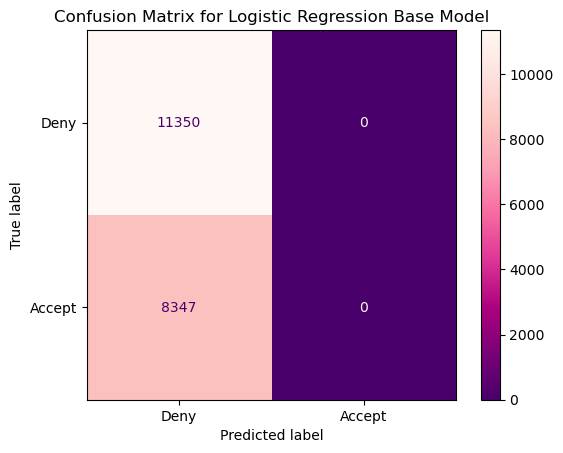

In [144]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(log_reg_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for Logistic Regression Base Model')
plt.show()

### KNN Classifier

In [132]:
# Displaying the train and test score for base model
train_test_score('KNN Classifier', knn_class_pipe)

KNN Classifier Base Model Score
Training Score:  0.6952
Testing Score:  0.5205


In [138]:
# Predict using base model
y_knn_class_pred = knn_class_pipe.predict(X_test_final)

y_knn_class_pred

array([0., 0., 0., ..., 0., 0., 1.])

<Figure size 700x700 with 0 Axes>

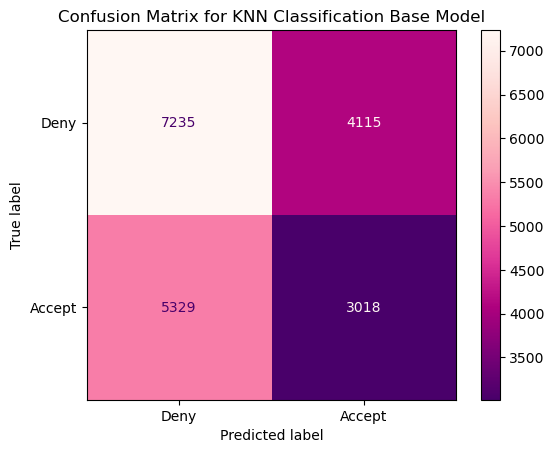

In [145]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(knn_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for KNN Classification Base Model')
plt.show()

### SVC

In [133]:
# Displaying the train and test score for base model
train_test_score('SVC', svc_pipe)

SVC Base Model Score
Training Score:  0.5777
Testing Score:  0.5762


In [139]:
# Predict using base model
y_svc_pred = svc_pipe.predict(X_test_final)

y_svc_pred

array([0., 0., 0., ..., 0., 0., 0.])

<Figure size 700x700 with 0 Axes>

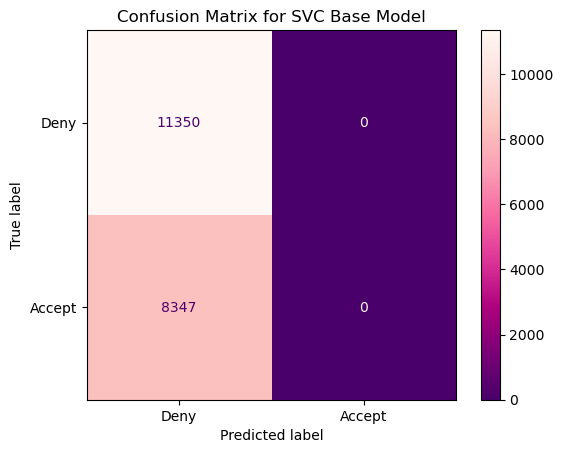

In [146]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(svc_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for SVC Base Model')
plt.show()

### Decision Tree Classifier

In [134]:
# Displaying the train and test score for base model
train_test_score('Decision Tree Classifier', dt_class_pipe)

Decision Tree Classifier Base Model Score
Training Score:  1.0
Testing Score:  0.506


In [140]:
# Predict using base model
y_dt_class_pred = dt_class_pipe.predict(X_test_final)

y_dt_class_pred

array([0., 1., 0., ..., 1., 0., 1.])

<Figure size 700x700 with 0 Axes>

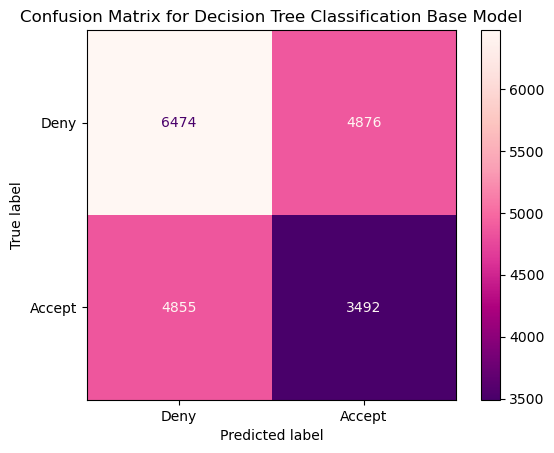

In [147]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(dt_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for Decision Tree Classification Base Model')
plt.show()

### Random Forest Classifier

In [135]:
# Displaying the train and test score for base model
train_test_score('Random Forest Classifier', rf_class_pipe)

Random Forest Classifier Base Model Score
Training Score:  1.0
Testing Score:  0.5423


In [141]:
# Predict using base model
y_rf_class_pred = rf_class_pipe.predict(X_test_final)

y_rf_class_pred

array([0., 0., 0., ..., 0., 0., 0.])

<Figure size 700x700 with 0 Axes>

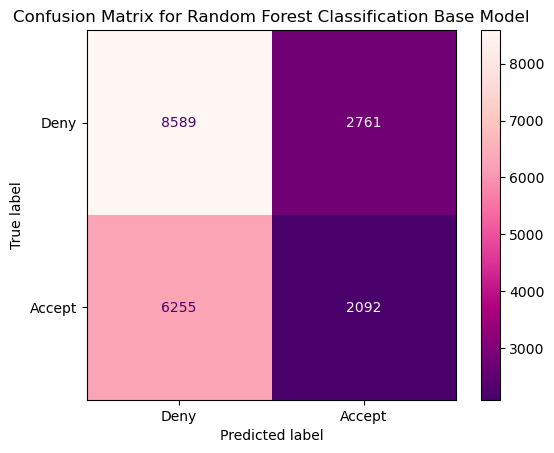

In [148]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(rf_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for Random Forest Classification Base Model')
plt.show()

### Gradient Boosting Classifier

In [136]:
# Displaying the train and test score for base model
train_test_score('Gradient Boosting Classifier', gbm_class_pipe)

Gradient Boosting Classifier Base Model Score
Training Score:  0.5798
Testing Score:  0.5756


In [142]:
# Predict using base model
y_gbm_class_pred = gbm_class_pipe.predict(X_test_final)

y_gbm_class_pred

array([0., 0., 0., ..., 0., 0., 0.])

<Figure size 700x700 with 0 Axes>

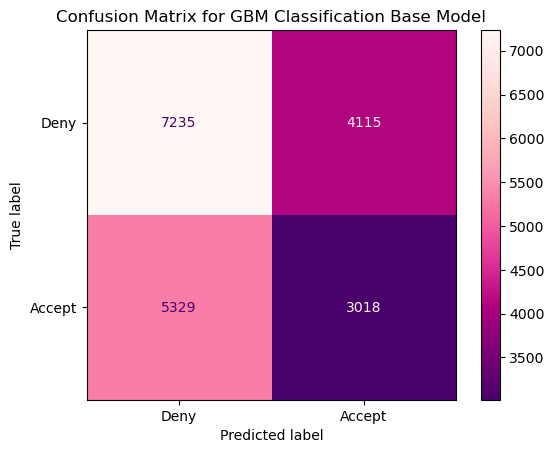

In [149]:
# Declaring Figure
plt.figure(figsize=(7,7))
target = ['Deny', 'Accept']

# Confusion matrix for base model
ConfusionMatrixDisplay.from_estimator(knn_class_pipe, X_test_final, y_test,display_labels=target, cmap='RdPu_r')

plt.title('Confusion Matrix for GBM Classification Base Model')
plt.show()